# Lorentz Transformation

## Introduction

The **Lorentz transformation** is a fundamental concept in special relativity that describes how measurements of space and time by two observers are related to each other. These transformations preserve the speed of light in all inertial reference frames, a cornerstone of Einstein's special theory of relativity.

## Historical Context

Named after the Dutch physicist Hendrik Lorentz, these transformations were developed to explain the negative result of the Michelson-Morley experiment and later became the mathematical foundation of special relativity.

## The Lorentz Transformation Equations

Consider two inertial reference frames $S$ and $S'$, where $S'$ moves with velocity $v$ along the positive $x$-axis relative to $S$. The Lorentz transformation relates the coordinates $(t, x, y, z)$ in frame $S$ to coordinates $(t', x', y', z')$ in frame $S'$:

$$t' = \gamma \left( t - \frac{vx}{c^2} \right)$$

$$x' = \gamma (x - vt)$$

$$y' = y$$

$$z' = z$$

where the **Lorentz factor** $\gamma$ is defined as:

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}} = \frac{1}{\sqrt{1 - \beta^2}}$$

and $\beta = v/c$ is the velocity as a fraction of the speed of light.

## Inverse Lorentz Transformation

The inverse transformation (from $S'$ to $S$) is obtained by replacing $v$ with $-v$:

$$t = \gamma \left( t' + \frac{vx'}{c^2} \right)$$

$$x = \gamma (x' + vt')$$

## Key Relativistic Effects

### Time Dilation

A clock at rest in $S'$ (at $x' = 0$) measures proper time $\Delta t' = \tau$. An observer in $S$ measures:

$$\Delta t = \gamma \Delta t' = \frac{\tau}{\sqrt{1 - v^2/c^2}}$$

Moving clocks run slower.

### Length Contraction

A rod at rest in $S'$ with proper length $L_0$ appears contracted in $S$:

$$L = \frac{L_0}{\gamma} = L_0 \sqrt{1 - v^2/c^2}$$

### Relativity of Simultaneity

Events that are simultaneous in one frame ($\Delta t = 0$) are generally not simultaneous in another frame ($\Delta t' \neq 0$).

## Spacetime Interval

The **spacetime interval** is invariant under Lorentz transformations:

$$\Delta s^2 = c^2 \Delta t^2 - \Delta x^2 - \Delta y^2 - \Delta z^2 = c^2 \Delta t'^2 - \Delta x'^2 - \Delta y'^2 - \Delta z'^2$$

This invariance is the mathematical expression of the principle that the speed of light is the same in all inertial frames.

## Implementation

We will now implement the Lorentz transformation and visualize several key aspects:
1. The Lorentz factor as a function of velocity
2. Coordinate transformation for different velocities
3. Time dilation and length contraction
4. Spacetime diagrams showing the transformation of events

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D

# Set up matplotlib for publication-quality figures
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 10

# Physical constants (we'll use c = 1 units for simplicity)
c = 1.0  # Speed of light

In [2]:
def lorentz_factor(v, c=1.0):
    """
    Calculate the Lorentz factor gamma.
    
    Parameters:
    -----------
    v : float or array
        Velocity of the moving frame
    c : float
        Speed of light (default = 1)
    
    Returns:
    --------
    gamma : float or array
        Lorentz factor
    """
    beta = v / c
    return 1.0 / np.sqrt(1 - beta**2)


def lorentz_transform(t, x, v, c=1.0):
    """
    Apply Lorentz transformation from frame S to S'.
    
    Parameters:
    -----------
    t : float or array
        Time coordinate in frame S
    x : float or array
        Position coordinate in frame S
    v : float
        Velocity of S' relative to S
    c : float
        Speed of light
    
    Returns:
    --------
    t_prime, x_prime : transformed coordinates in S'
    """
    gamma = lorentz_factor(v, c)
    t_prime = gamma * (t - v * x / c**2)
    x_prime = gamma * (x - v * t)
    return t_prime, x_prime


def inverse_lorentz_transform(t_prime, x_prime, v, c=1.0):
    """
    Apply inverse Lorentz transformation from frame S' to S.
    
    Parameters:
    -----------
    t_prime : float or array
        Time coordinate in frame S'
    x_prime : float or array
        Position coordinate in frame S'
    v : float
        Velocity of S' relative to S
    c : float
        Speed of light
    
    Returns:
    --------
    t, x : transformed coordinates in S
    """
    gamma = lorentz_factor(v, c)
    t = gamma * (t_prime + v * x_prime / c**2)
    x = gamma * (x_prime + v * t_prime)
    return t, x

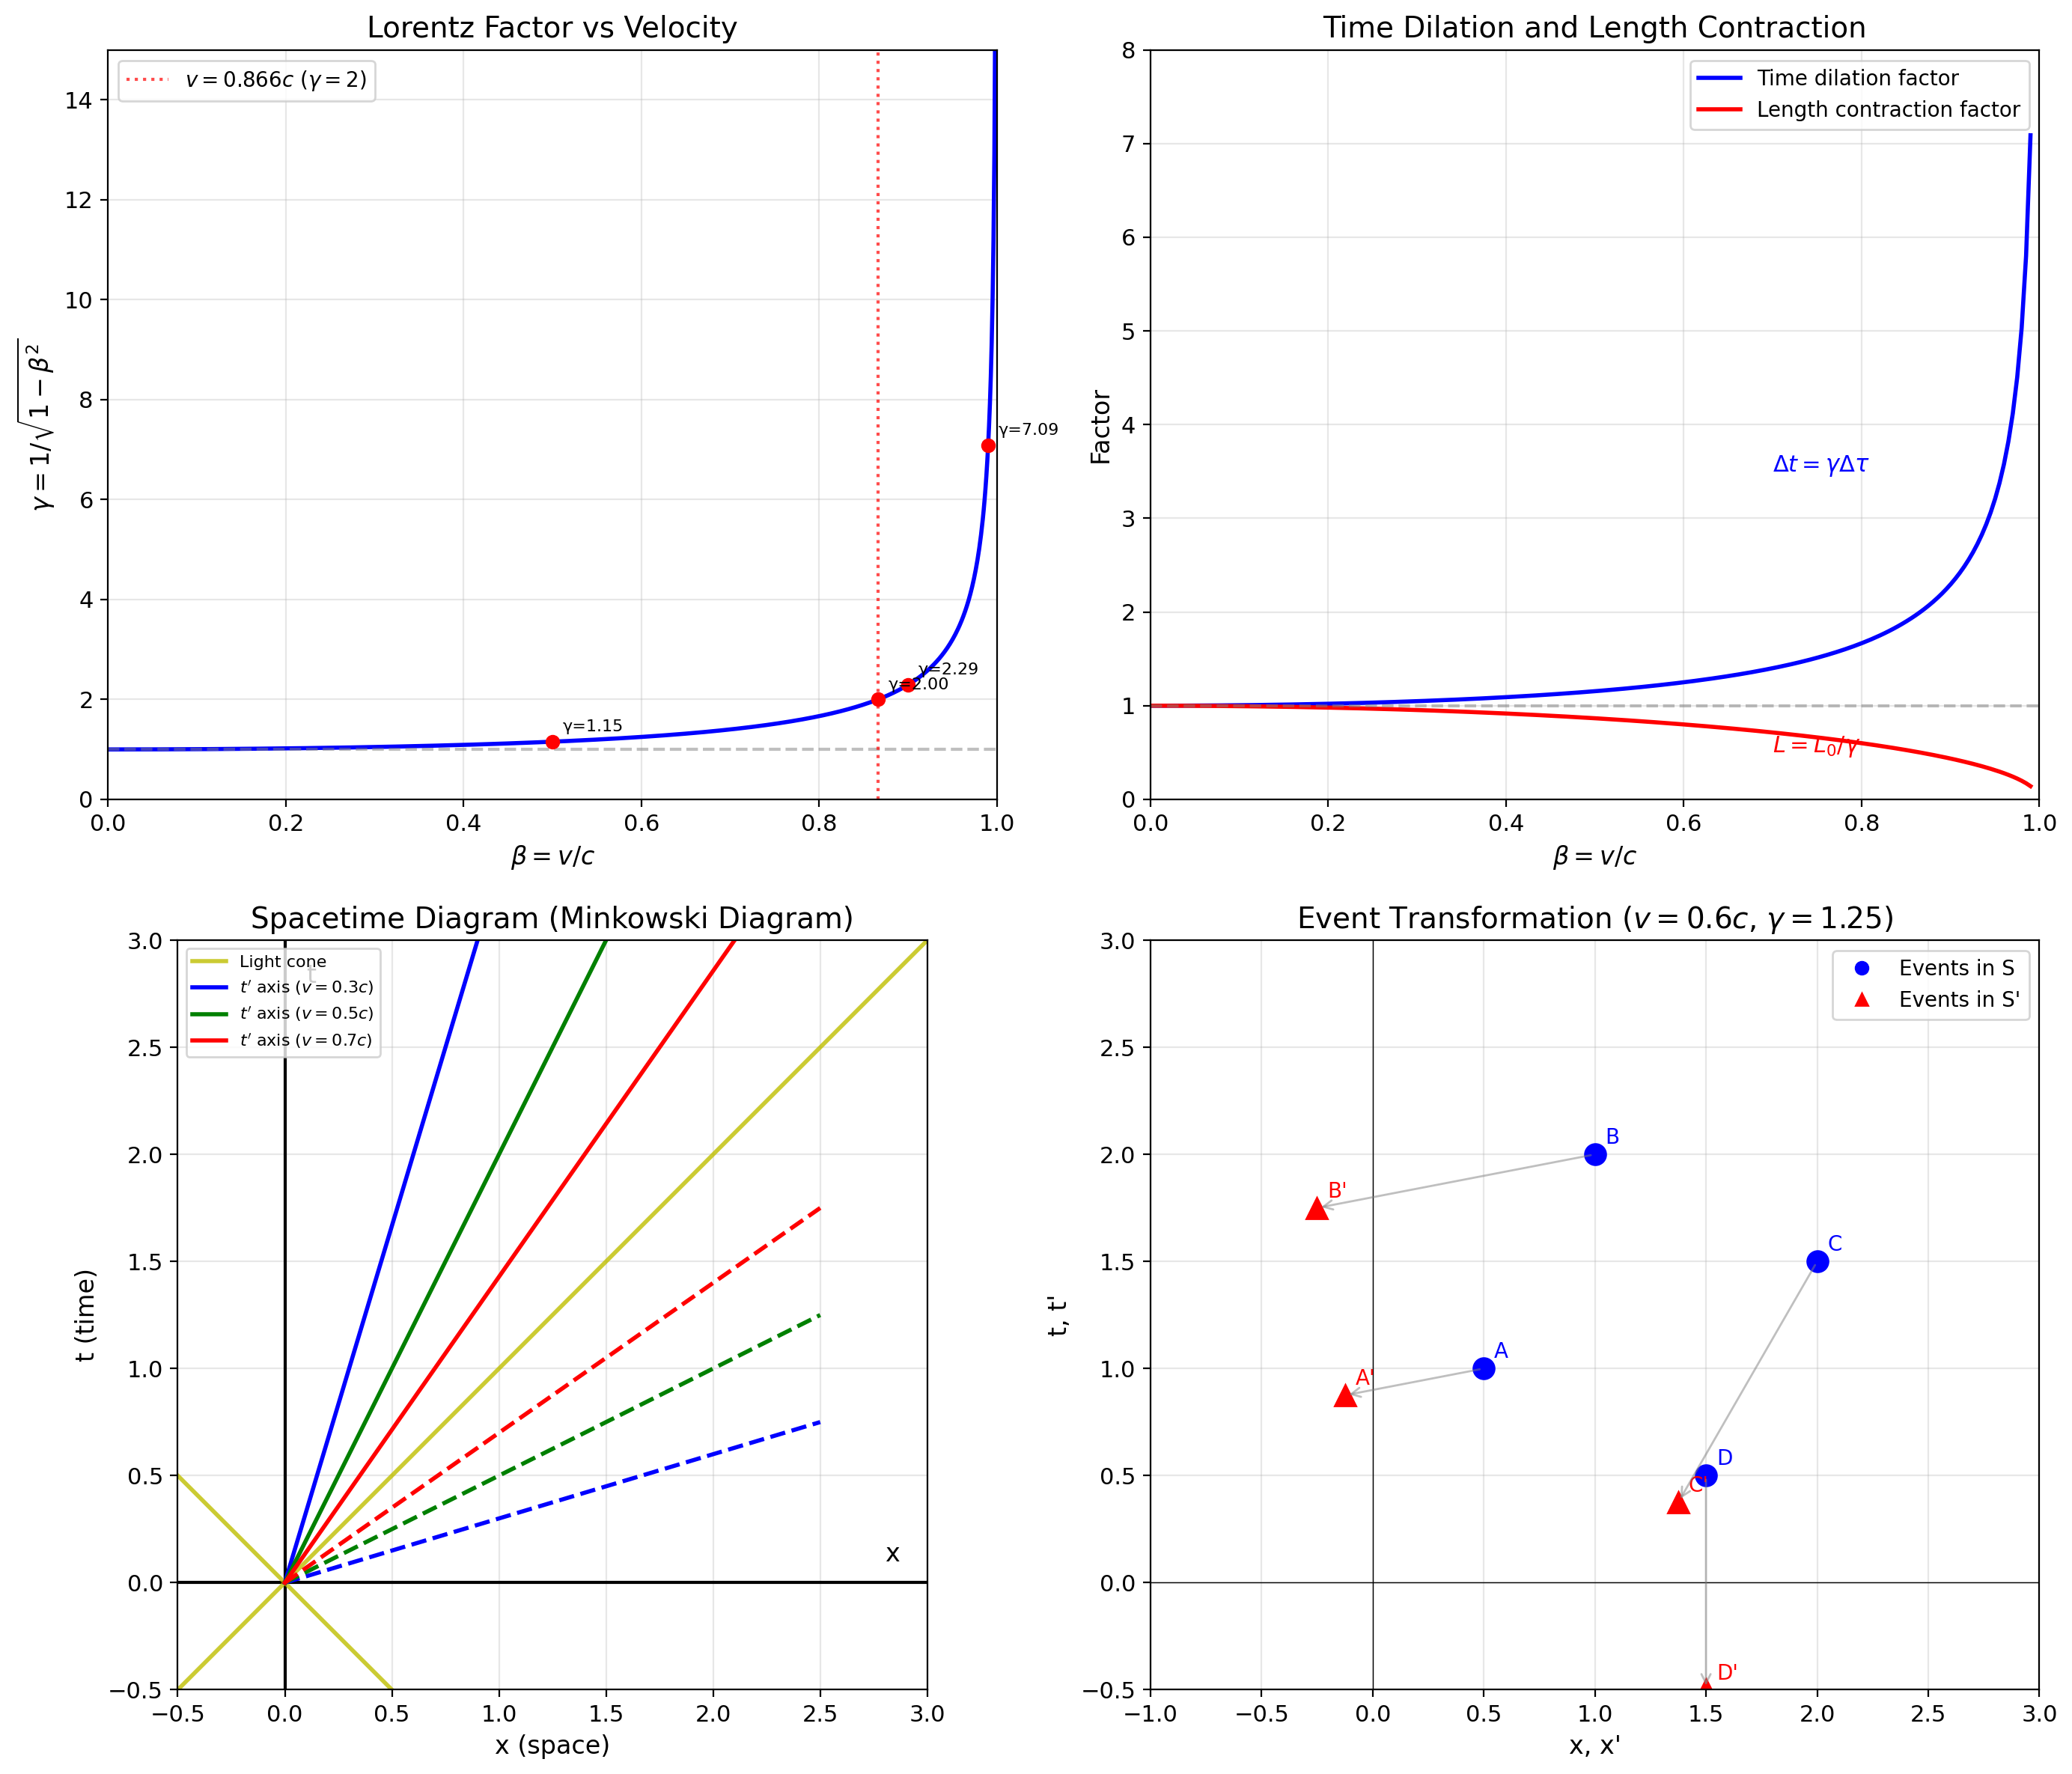


Figure saved as 'lorentz_transformation_comprehensive_analysis.png'


In [3]:
# Create a comprehensive figure with multiple subplots
fig = plt.figure(figsize=(14, 12))

# ============================================================
# Plot 1: Lorentz Factor vs Velocity
# ============================================================
ax1 = fig.add_subplot(2, 2, 1)

# Velocity range (as fraction of c)
beta_values = np.linspace(0, 0.999, 1000)
v_values = beta_values * c
gamma_values = lorentz_factor(v_values, c)

ax1.plot(beta_values, gamma_values, 'b-', linewidth=2)
ax1.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(x=0.866, color='r', linestyle=':', alpha=0.7, label=r'$v=0.866c$ ($\gamma=2$)')

# Mark some notable points
notable_betas = [0.5, 0.866, 0.9, 0.99]
for beta in notable_betas:
    gamma = lorentz_factor(beta * c, c)
    ax1.plot(beta, gamma, 'ro', markersize=6)
    ax1.annotate(f'γ={gamma:.2f}', (beta, gamma), 
                 textcoords='offset points', xytext=(5, 5), fontsize=8)

ax1.set_xlabel(r'$\beta = v/c$')
ax1.set_ylabel(r'$\gamma = 1/\sqrt{1-\beta^2}$')
ax1.set_title('Lorentz Factor vs Velocity')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 15)
ax1.grid(True, alpha=0.3)
ax1.legend()

# ============================================================
# Plot 2: Time Dilation and Length Contraction
# ============================================================
ax2 = fig.add_subplot(2, 2, 2)

beta_range = np.linspace(0, 0.99, 200)
gamma_range = lorentz_factor(beta_range * c, c)

# Time dilation: Δt = γΔτ (moving clocks run slower)
time_dilation = gamma_range

# Length contraction: L = L₀/γ (moving objects appear shorter)
length_contraction = 1.0 / gamma_range

ax2.plot(beta_range, time_dilation, 'b-', linewidth=2, label='Time dilation factor')
ax2.plot(beta_range, length_contraction, 'r-', linewidth=2, label='Length contraction factor')
ax2.axhline(y=1, color='gray', linestyle='--', alpha=0.5)

ax2.set_xlabel(r'$\beta = v/c$')
ax2.set_ylabel('Factor')
ax2.set_title('Time Dilation and Length Contraction')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 8)
ax2.grid(True, alpha=0.3)
ax2.legend()

# Add annotation
ax2.annotate(r'$\Delta t = \gamma \Delta \tau$', xy=(0.7, 3.5), fontsize=11, color='blue')
ax2.annotate(r'$L = L_0 / \gamma$', xy=(0.7, 0.5), fontsize=11, color='red')

# ============================================================
# Plot 3: Spacetime Diagram (Minkowski Diagram)
# ============================================================
ax3 = fig.add_subplot(2, 2, 3)

# Draw axes for frame S
ax3.axhline(y=0, color='black', linewidth=1.5)
ax3.axvline(x=0, color='black', linewidth=1.5)

# Light cone (world lines of light)
t_light = np.linspace(-3, 3, 100)
ax3.plot(t_light, t_light, 'y-', linewidth=2, label='Light cone', alpha=0.8)
ax3.plot(t_light, -t_light, 'y-', linewidth=2, alpha=0.8)

# Velocities to show (as fractions of c)
velocities = [0.3, 0.5, 0.7]
colors = ['blue', 'green', 'red']

for v_frac, color in zip(velocities, colors):
    v = v_frac * c
    gamma = lorentz_factor(v, c)
    
    # t' axis (x' = 0 line in S coordinates): t = x/v
    x_tprime = np.linspace(0, 2.5, 50)
    t_tprime = x_tprime / v_frac
    ax3.plot(x_tprime, t_tprime, color=color, linewidth=2, 
             label=f"$t'$ axis ($v={v_frac}c$)")
    
    # x' axis (t' = 0 line in S coordinates): t = vx/c²
    x_xprime = np.linspace(0, 2.5, 50)
    t_xprime = v_frac * x_xprime
    ax3.plot(x_xprime, t_xprime, color=color, linewidth=2, linestyle='--')

ax3.set_xlabel('x (space)')
ax3.set_ylabel('t (time)')
ax3.set_title('Spacetime Diagram (Minkowski Diagram)')
ax3.set_xlim(-0.5, 3)
ax3.set_ylim(-0.5, 3)
ax3.set_aspect('equal')
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left', fontsize=8)

# Labels
ax3.text(2.8, 0.1, 'x', fontsize=12)
ax3.text(0.1, 2.8, 't', fontsize=12)

# ============================================================
# Plot 4: Event Transformation
# ============================================================
ax4 = fig.add_subplot(2, 2, 4)

# Define some events in frame S
events_S = [
    (1.0, 0.5, 'A'),
    (2.0, 1.0, 'B'),
    (1.5, 2.0, 'C'),
    (0.5, 1.5, 'D')
]

# Transform to frame S' with v = 0.6c
v = 0.6 * c
gamma = lorentz_factor(v, c)

# Plot events in both frames
for t, x, label in events_S:
    # Original event in S
    ax4.plot(x, t, 'bo', markersize=10)
    ax4.annotate(f'{label}', (x, t), textcoords='offset points', 
                 xytext=(5, 5), fontsize=10, color='blue')
    
    # Transformed event in S'
    t_prime, x_prime = lorentz_transform(t, x, v, c)
    ax4.plot(x_prime, t_prime, 'r^', markersize=10)
    ax4.annotate(f"{label}'", (x_prime, t_prime), textcoords='offset points', 
                 xytext=(5, 5), fontsize=10, color='red')
    
    # Draw arrow from S to S'
    ax4.annotate('', xy=(x_prime, t_prime), xytext=(x, t),
                 arrowprops=dict(arrowstyle='->', color='gray', alpha=0.5))

ax4.axhline(y=0, color='black', linewidth=0.5)
ax4.axvline(x=0, color='black', linewidth=0.5)

ax4.set_xlabel('x, x\'')
ax4.set_ylabel('t, t\'')
ax4.set_title(f'Event Transformation ($v = {v/c:.1f}c$, $\\gamma = {gamma:.2f}$)')
ax4.set_xlim(-1, 3)
ax4.set_ylim(-0.5, 3)
ax4.grid(True, alpha=0.3)

# Add legend
ax4.plot([], [], 'bo', label='Events in S')
ax4.plot([], [], 'r^', label="Events in S'")
ax4.legend()

plt.tight_layout()
plt.savefig('lorentz_transformation_comprehensive_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved as 'lorentz_transformation_comprehensive_analysis.png'")

## Numerical Examples

Let's compute some specific examples to illustrate the Lorentz transformation.

In [4]:
# Example 1: Time dilation for a spacecraft
print("=" * 60)
print("Example 1: Time Dilation")
print("=" * 60)

v_spacecraft = 0.8 * c  # Spacecraft moving at 0.8c
gamma_spacecraft = lorentz_factor(v_spacecraft, c)
proper_time = 1.0  # 1 year in spacecraft frame

earth_time = gamma_spacecraft * proper_time

print(f"Spacecraft velocity: {v_spacecraft/c:.1f}c")
print(f"Lorentz factor: γ = {gamma_spacecraft:.4f}")
print(f"Proper time (spacecraft): {proper_time} year")
print(f"Time elapsed on Earth: {earth_time:.4f} years")
print(f"\nFor every year on the spacecraft, {earth_time:.2f} years pass on Earth.")

Example 1: Time Dilation
Spacecraft velocity: 0.8c
Lorentz factor: γ = 1.6667
Proper time (spacecraft): 1.0 year
Time elapsed on Earth: 1.6667 years

For every year on the spacecraft, 1.67 years pass on Earth.


In [5]:
# Example 2: Length contraction
print("\n" + "=" * 60)
print("Example 2: Length Contraction")
print("=" * 60)

proper_length = 100.0  # meters (length at rest)
v = 0.9 * c
gamma = lorentz_factor(v, c)

contracted_length = proper_length / gamma

print(f"Object velocity: {v/c:.1f}c")
print(f"Lorentz factor: γ = {gamma:.4f}")
print(f"Proper length (at rest): {proper_length} m")
print(f"Contracted length (moving): {contracted_length:.2f} m")
print(f"\nThe object appears {(1 - contracted_length/proper_length)*100:.1f}% shorter.")


Example 2: Length Contraction
Object velocity: 0.9c
Lorentz factor: γ = 2.2942
Proper length (at rest): 100.0 m
Contracted length (moving): 43.59 m

The object appears 56.4% shorter.


In [6]:
# Example 3: Relativity of simultaneity
print("\n" + "=" * 60)
print("Example 3: Relativity of Simultaneity")
print("=" * 60)

# Two events simultaneous in frame S
t_A, x_A = 0.0, 0.0
t_B, x_B = 0.0, 10.0  # Same time, different positions

v = 0.5 * c
gamma = lorentz_factor(v, c)

t_A_prime, x_A_prime = lorentz_transform(t_A, x_A, v, c)
t_B_prime, x_B_prime = lorentz_transform(t_B, x_B, v, c)

print(f"Frame S' velocity: {v/c:.1f}c")
print(f"\nIn frame S (simultaneous events):")
print(f"  Event A: (t={t_A}, x={x_A})")
print(f"  Event B: (t={t_B}, x={x_B})")
print(f"\nIn frame S':")
print(f"  Event A': (t'={t_A_prime:.4f}, x'={x_A_prime:.4f})")
print(f"  Event B': (t'={t_B_prime:.4f}, x'={x_B_prime:.4f})")
print(f"\nTime difference in S': Δt' = {t_B_prime - t_A_prime:.4f}")
print(f"\nEvents that are simultaneous in S are NOT simultaneous in S'.")
print(f"In S', event A occurs AFTER event B (by {abs(t_B_prime - t_A_prime):.4f} time units).")


Example 3: Relativity of Simultaneity
Frame S' velocity: 0.5c

In frame S (simultaneous events):
  Event A: (t=0.0, x=0.0)
  Event B: (t=0.0, x=10.0)

In frame S':
  Event A': (t'=0.0000, x'=0.0000)
  Event B': (t'=-5.7735, x'=11.5470)

Time difference in S': Δt' = -5.7735

Events that are simultaneous in S are NOT simultaneous in S'.
In S', event A occurs AFTER event B (by 5.7735 time units).


In [7]:
# Example 4: Invariance of spacetime interval
print("\n" + "=" * 60)
print("Example 4: Invariance of Spacetime Interval")
print("=" * 60)

# Two events
t1, x1 = 0.0, 0.0
t2, x2 = 3.0, 4.0

# Spacetime interval in S
ds_squared_S = c**2 * (t2 - t1)**2 - (x2 - x1)**2

# Transform to S' with v = 0.6c
v = 0.6 * c
t1_prime, x1_prime = lorentz_transform(t1, x1, v, c)
t2_prime, x2_prime = lorentz_transform(t2, x2, v, c)

# Spacetime interval in S'
ds_squared_S_prime = c**2 * (t2_prime - t1_prime)**2 - (x2_prime - x1_prime)**2

print(f"Event 1 in S: (t={t1}, x={x1})")
print(f"Event 2 in S: (t={t2}, x={x2})")
print(f"\nSpacetime interval in S: Δs² = {ds_squared_S:.4f}")
print(f"\nEvent 1 in S': (t'={t1_prime:.4f}, x'={x1_prime:.4f})")
print(f"Event 2 in S': (t'={t2_prime:.4f}, x'={x2_prime:.4f})")
print(f"\nSpacetime interval in S': Δs² = {ds_squared_S_prime:.4f}")
print(f"\nDifference: |Δs²_S - Δs²_S'| = {abs(ds_squared_S - ds_squared_S_prime):.2e}")
print(f"\nThe spacetime interval is INVARIANT under Lorentz transformations.")


Example 4: Invariance of Spacetime Interval
Event 1 in S: (t=0.0, x=0.0)
Event 2 in S: (t=3.0, x=4.0)

Spacetime interval in S: Δs² = -7.0000

Event 1 in S': (t'=0.0000, x'=0.0000)
Event 2 in S': (t'=0.7500, x'=2.7500)

Spacetime interval in S': Δs² = -7.0000

Difference: |Δs²_S - Δs²_S'| = 0.00e+00

The spacetime interval is INVARIANT under Lorentz transformations.


## Conclusion

The Lorentz transformation is the mathematical foundation of special relativity, encoding the fundamental interrelationship between space and time. Key takeaways:

1. **The Lorentz factor** $\gamma$ determines the magnitude of relativistic effects and approaches infinity as $v \to c$.

2. **Time dilation** means moving clocks run slower: $\Delta t = \gamma \Delta \tau$.

3. **Length contraction** means moving objects appear shorter: $L = L_0/\gamma$.

4. **Simultaneity is relative**: events simultaneous in one frame are generally not simultaneous in another.

5. **The spacetime interval** $\Delta s^2 = c^2\Delta t^2 - \Delta x^2$ is invariant under Lorentz transformations.

These results have been confirmed by countless experiments, from muon decay observations to GPS satellite corrections, and form the basis of our modern understanding of space, time, and the structure of the universe.